In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import neighbors, datasets
from sklearn.externals import joblib

# Customers

In [2]:
df_cust = pd.read_csv("C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/customers.csv",sep = ",")
df_cust.describe()

,cust_id,months,jan_month_spending,jan_month_freq,feb_month_spending,feb_month_freq,mar_month_spending,mar_month_freq,apr_month_spending,apr_month_freq,...,Wednesday_spending,Thursday_spending,Friday_spending,Saturday_spending,Sunday_spending,discount_rate,discount_freq,product_types,total_spending,total_freq
count,7.920000e+03,7920.0,7912.000000,7912.000000,7910.000000,7910.000000,7918.000000,7918.000000,7918.000000,7918.000000,...,7920.000000,7920.000000,7919.000000,7914.000000,7891.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,5.026131e+07,12.0,564.259422,26.851744,556.288115,25.953477,689.963531,28.583481,730.296186,28.221647,...,1069.724203,1094.307754,1276.008615,1474.715330,1015.076472,0.159422,0.316341,982.333965,7855.023708,0.464639
std,2.907775e+07,0.0,213.413044,9.990585,200.910632,9.369765,235.766944,10.040265,243.608667,9.478814,...,447.896751,490.705602,673.946262,975.124616,746.463503,0.045764,0.081338,255.538698,1953.920574,0.134540
min,2.956800e+04,12.0,5.820000,1.000000,10.420000,1.000000,6.060000,1.000000,14.760000,1.000000,...,4.480000,16.800000,9.750000,3.990000,4.440000,0.034121,0.102283,113.000000,3867.100000,0.052055
25%,2.500981e+07,12.0,417.417500,20.000000,417.465000,20.000000,524.595000,22.000000,559.012500,22.000000,...,770.555000,788.657500,861.520000,874.285000,553.585000,0.127091,0.256843,808.000000,6292.082500,0.375342
50%,5.038985e+07,12.0,539.920000,26.000000,536.100000,25.000000,662.165000,28.000000,696.380000,27.000000,...,1004.430000,1021.935000,1141.610000,1257.075000,867.060000,0.158654,0.310044,975.000000,7465.375000,0.439726
75%,7.573990e+07,12.0,690.917500,33.000000,672.662500,32.000000,832.270000,34.000000,874.982500,34.000000,...,1300.385000,1314.760000,1510.620000,1787.002500,1270.155000,0.190315,0.368041,1146.250000,9137.697500,0.536986
max,9.999978e+07,12.0,2494.720000,60.000000,2480.960000,57.000000,1914.150000,62.000000,2676.580000,60.000000,...,4897.710000,7006.220000,9307.430000,10244.560000,7972.170000,0.373796,0.792453,1972.000000,14019.710000,0.991781


In [3]:
y = df_cust.values[:,0]
x = df_cust.values[:,2:]

# standardization
scalerX = MinMaxScaler(feature_range=(0, 1))
x_std_cust = scalerX.fit_transform(x)
x_std_cust

array([[0.36305195, 0.6440678 , 0.30014086, ..., 0.44271114, 0.57917225,
        0.58892128],
       [0.27732332, 0.44067797, 0.26951598, ..., 0.64658419, 0.61464096,
        0.45772595],
       [0.20146651, 0.81355932, 0.1952731 , ..., 0.37762238, 0.34725947,
        0.78425656],
       ...,
       [0.19671341, 0.30508475, 0.13599051, ..., 0.10274341, 0.6121549 ,
        0.47813411],
       [0.17615814, 0.37288136, 0.17130668, ..., 0.0957504 , 0.21922048,
        0.43294461],
       [0.13979268, 0.15254237, 0.13887652, ..., 0.02366864, 0.21118116,
        0.13848396]])

In [4]:
len(x_std_cust)

7920

In [5]:
df = pd.DataFrame(x_std_cust)
df = df.dropna()
x_std_cust = df.values

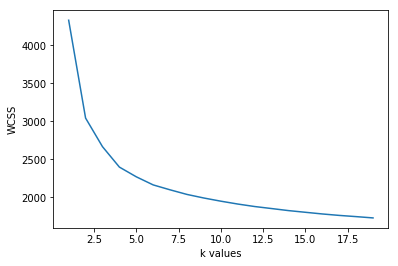

In [6]:
# use WCSS to to help choose right K for knn model

wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_std_cust)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

Text(0.98, 0.98, 'Final Clustering')

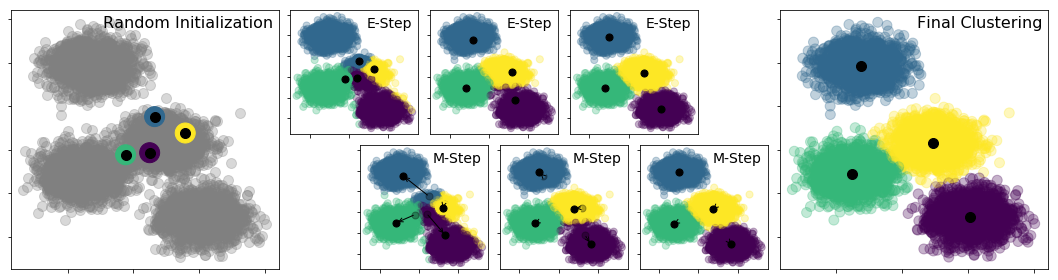

In [8]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

x_std_cust, y_true = make_blobs(n_samples=7920, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(x_std_cust[:, 0], x_std_cust[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(x_std_cust, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([x_std_cust[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(x_std_cust, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


In [9]:
df_cust['centroids']=y_pred
df_cust.to_csv('C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/customers_centroid.csv',index=True,header=True)

# Products

In [10]:
df_pro = pd.read_csv("C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/product_data.csv",sep = ",")
df_pro.describe()

,prod_id,category_id,pvol,prev,pprofit,ptran,pcustomer,pfreq
count,1.076700e+04,10767.000000,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000
mean,9.784566e+08,95793.357110,4.587865e+03,6885.783795,5777.826166,2750.723136,722.563388,84.127426
std,1.241284e+08,217.559322,2.239435e+04,21400.840402,19184.911897,11909.020233,924.024770,73.586633
min,1.455190e+08,95052.000000,3.000000e+00,501.610000,500.020000,3.000000,2.000000,0.000000
25%,9.991863e+08,95731.000000,3.400000e+02,1132.145000,935.065000,301.000000,187.000000,30.000000
50%,9.992611e+08,95811.000000,9.090000e+02,2317.070000,1892.240000,752.000000,402.000000,64.000000
75%,9.994212e+08,95971.000000,2.762835e+03,5582.555000,4566.190000,2037.500000,877.000000,117.000000
max,9.999997e+08,96036.000000,1.063089e+06,612682.220000,602109.430000,769890.000000,7862.000000,540.000000


In [11]:
y = df_pro.values[:,0]
x = df_pro.values[:,2:]

# standardization
scalerX = MinMaxScaler(feature_range=(0, 1))
x_std_pro = scalerX.fit_transform(x)
x_std_pro

array([[1.79759681e-03, 1.39228520e-03, 3.83886948e-04, 5.42936821e-04,
        3.79134860e-02, 8.14814815e-02],
       [3.01668915e-03, 2.90219907e-03, 1.23992409e-03, 8.81947610e-04,
        5.26717557e-02, 9.25925926e-02],
       [1.47871386e-03, 1.02450158e-03, 1.69728063e-04, 4.54612170e-04,
        3.34605598e-02, 8.14814815e-02],
       ...,
       [2.43348139e-03, 1.67628635e-03, 1.68913581e-03, 9.61180017e-04,
        2.59541985e-02, 7.22222222e-02],
       [3.68775433e-02, 3.01084185e-02, 2.94979595e-02, 4.50910328e-02,
        6.33969466e-01, 4.37037037e-01],
       [7.70336549e-04, 1.49008313e-03, 1.47136994e-03, 8.55969772e-04,
        5.31806616e-02, 5.18518519e-02]])

In [12]:
len(x_std_pro)

10767

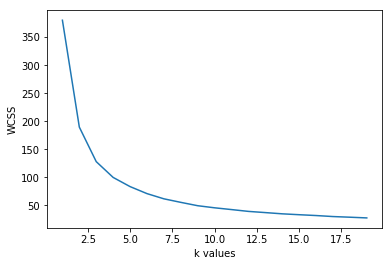

In [13]:
# use WCSS to to help choose right K for knn model

wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_std_pro)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

Text(0.98, 0.98, 'Final Clustering')

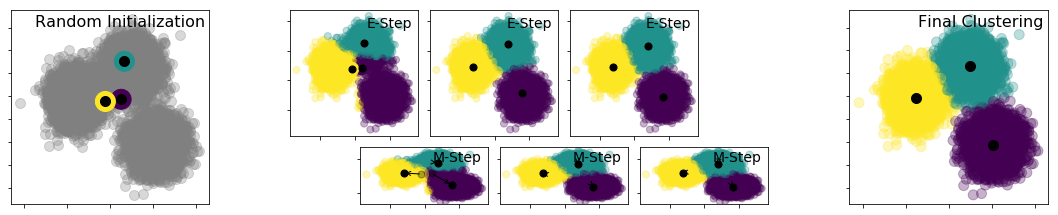

In [14]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

x_std_pro, y = make_blobs(n_samples=10767, centers=3,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 3] + rng.randn(3, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(x_std_pro[:, 0], x_std_pro[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(3), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 3))
gs = plt.GridSpec(3, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:3, :3])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(x_std_pro, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([x_std_pro[y_pred == i].mean(0) for i in range(3)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(3):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(x_std_pro, centers)
axf = make_ax(fig, gs[:3, -3:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

In [15]:
df_pro['centroids']=y_pred
df_pro.to_csv('C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/product_data_centroid.csv',index=True,header=True)

# Category

In [16]:
df_cate = pd.read_csv("C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/productcategory_data.csv",sep = ",")
df_cate.describe()

,category_id,gvol,grev,gprofit,gtran,gcustomer,gfreq
count,429.000000,4.290000e+02,4.290000e+02,4.290000e+02,429.000000,429.000000,429.000000
mean,95699.233100,1.151458e+05,1.728187e+05,1.450113e+05,60800.368298,3847.347319,330.974359
std,266.648219,2.644081e+05,3.313018e+05,2.847779e+05,99519.384427,2761.382370,222.503033
min,95052.000000,3.000000e+00,5.058700e+02,5.040900e+02,3.000000,3.000000,0.000000
25%,95607.000000,2.962000e+03,1.053664e+04,9.092240e+03,2594.000000,1149.000000,109.000000
50%,95758.000000,1.974700e+04,4.901956e+04,4.250003e+04,16078.000000,3501.000000,331.000000
75%,95905.000000,1.067360e+05,1.662698e+05,1.513537e+05,78001.000000,6695.000000,553.000000
max,96036.000000,2.206697e+06,2.525658e+06,2.483963e+06,831809.000000,7898.000000,635.000000


In [17]:
y = df_cate.values[:,0]
x = df_cate.values[:,2:]

# standardization
scalerX = MinMaxScaler(feature_range=(0, 1))
x_std_cate = scalerX.fit_transform(x)
x_std_cate

C:\Users\14702\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[6.75722182e-01, 4.39928716e-01, 3.16433348e-01, 3.48702702e-01,
        9.67194427e-01, 1.00000000e+00],
       [1.91643710e-01, 2.38932206e-01, 1.95780257e-01, 2.44740961e-01,
        9.61621279e-01, 1.00000000e+00],
       [5.31892989e-01, 2.79685780e-01, 1.97574577e-01, 2.55404505e-01,
        9.17542749e-01, 9.98425197e-01],
       ...,
       [1.84755622e-03, 4.84173220e-03, 4.05765458e-03, 6.76359632e-03,
        3.07789740e-01, 2.45669291e-01],
       [4.94477649e-03, 1.18207575e-02, 9.66195419e-03, 1.91030120e-02,
        5.56554782e-01, 1.48031496e-01],
       [2.27036476e-04, 9.69086198e-04, 9.77885967e-04, 5.24160682e-04,
        3.82520583e-02, 2.67716535e-02]])

In [18]:
len(x_std_cate)

429

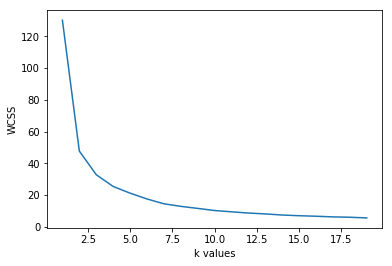

In [19]:
# use WCSS to to help choose right K for knn model

wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_std_cate)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

Text(0.98, 0.98, 'Final Clustering')

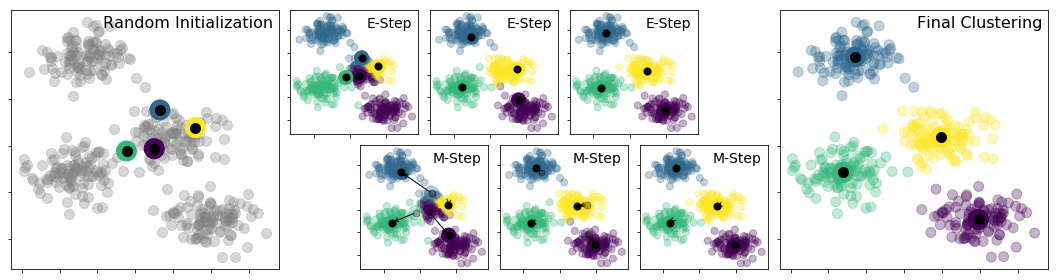

In [20]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

x_std_cate, y_true = make_blobs(n_samples=429, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(x_std_cate[:, 0], x_std_cate[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(x_std_cate, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([x_std_cate[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(x_std_cate, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


In [21]:
df_cate['centroids']=y_pred
df_cate.to_csv('C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/productcategory_data_centroid.csv',index=True,header=True)

# Stores 

In [22]:
df = pd.read_csv("C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/stores_data.csv",sep = ",")
df.describe()

,store_id,volume,revenue,profit,transaction,profit_trans,revenue_trans,customer,profit_cust,revenue_cust,discount_rate,discount_freq,weekend_freq,product_types
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,441.838480,117333.831204,176102.693872,147766.874893,6723.282660,22.065815,26.266324,124.864608,1326.894492,1579.677695,0.156662,0.308738,0.306075,5654.323040
std,195.880242,85985.642105,128909.832756,105895.153141,4370.275529,4.525642,5.747799,88.973261,730.841922,878.211936,0.023801,0.042330,0.052582,1621.952947
min,102.000000,2.000000,4.150000,4.150000,1.000000,4.150000,4.150000,1.000000,4.150000,4.150000,0.000000,0.000000,0.000000,2.000000
25%,278.000000,68873.945000,102874.170000,87527.460000,4026.000000,19.019793,22.481219,74.000000,818.671280,964.325065,0.145114,0.287571,0.279875,4923.000000
50%,398.000000,95677.299000,146450.190000,122845.050000,5801.000000,22.062529,26.263596,104.000000,1194.953971,1430.088627,0.157962,0.308471,0.307498,5792.000000
75%,593.000000,143126.259000,215748.550000,180483.920000,8322.000000,24.870915,29.738179,150.000000,1727.538807,2082.793333,0.170748,0.332144,0.333718,6594.000000
max,999.000000,670290.662000,955668.720000,786520.950000,30357.000000,38.711849,46.873000,836.000000,3835.154815,4699.808519,0.238560,0.472699,0.594724,9521.000000


In [23]:
y = df.values[:,0]
x = df.values[:,1:]

# standardization
scalerX = MinMaxScaler(feature_range=(0, 1))
x_stan = scalerX.fit_transform(x)
x_stan

array([[3.15342183e-01, 3.36899494e-01, 3.48330169e-01, ...,
        6.12233686e-01, 4.66420689e-01, 8.25506881e-01],
       [8.34595385e-01, 8.94792228e-01, 8.65380447e-01, ...,
        8.09821812e-01, 5.66505956e-01, 9.73946843e-01],
       [1.32819367e-01, 1.26119921e-01, 1.25968600e-01, ...,
        6.82533614e-01, 4.36583914e-01, 5.29677487e-01],
       ...,
       [3.21506259e-04, 4.86132912e-04, 4.68559604e-04, ...,
        5.06709731e-01, 6.84663707e-01, 1.52326925e-02],
       [5.81838873e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.89433413e-07, 1.08071436e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

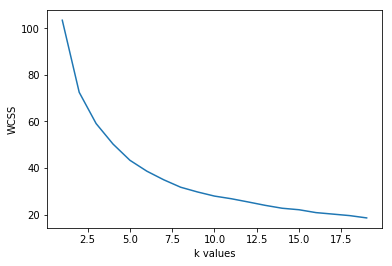

In [24]:
# use WCSS to to help choose right K for knn model

wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_stan)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

Text(0.98, 0.98, 'Final Clustering')

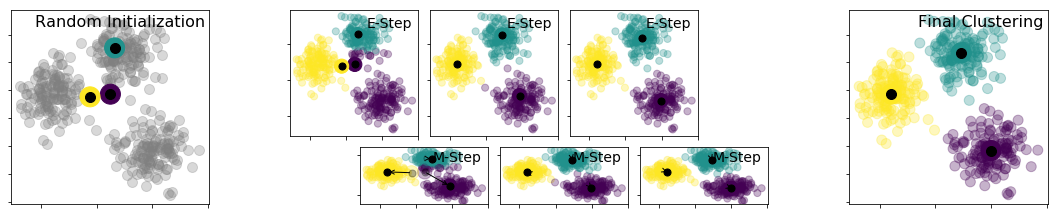

In [26]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

x_stan, y = make_blobs(n_samples=421, centers=3,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 3] + rng.randn(3, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(x_stan[:, 0], x_stan[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(3), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 3))
gs = plt.GridSpec(3, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:3, :3])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(x_stan, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([x_stan[y_pred == i].mean(0) for i in range(3)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(3):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(x_stan, centers)
axf = make_ax(fig, gs[:3, -3:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

In [27]:
df['centroids']=y_pred
df.to_csv('C:/Users/14702/OneDrive/Desktop/Emory/Macketing Analysis/Project 1 - Exploratory Data Analysis/stores_data_centroid.csv',index=True,header=True)